In [2]:
import pandas as pd


# Tratamento dos dados


In [3]:
import os

file_path = r'.\dataset _original _rodada _1 _(vinho _branco) _FieldSpec.xlsx'
#file_path = r'C:\Users\lenau\Documents\GitHub\field_spec_data_tests\dataset_original_rodada_1_(vinho_branco)_FieldSpec.xlsx'

#importando o arquivo e guardando na variável file_path

fs_df = pd.read_excel(file_path)
#o pandas como pd lê o arquivo em file_path e guarda na variavel fs_df

#fs_df

In [4]:
fs_df.tail()

,Wavelength,Date,Tank,TA,AV,AT,pH,MV,AR,350,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
37,amostra_00038.asd.txt,2022-11-09,110,11.5,0.27,5.10,3.8,995,1.8,1.503835,...,2.656636,2.550109,2.501081,2.471406,2.529202,2.619732,2.639313,2.598884,2.575628,2.642086
38,amostra_00039.asd.txt,2022-11-09,110,11.5,0.27,5.10,3.8,995,1.8,1.664785,...,2.797181,2.758138,3.052151,3.213511,3.071573,3.178512,3.150150,3.103570,3.097533,3.154010
39,amostra_00040.asd.txt,2022-11-09,110,11.5,0.29,5.17,3.8,995,1.8,1.863774,...,3.127336,2.887030,2.822618,2.870859,2.779617,2.837596,2.990740,2.869202,2.732040,2.635091
40,amostra_00041.asd.txt,2022-11-09,110,11.5,0.29,5.17,3.8,995,1.8,1.670042,...,2.718212,2.633415,2.549066,2.544755,2.590426,2.767958,3.169085,3.571220,3.605718,4.104746
41,amostra_00042.asd.txt,2022-11-09,110,11.5,0.27,5.10,3.8,995,1.8,1.695179,...,2.745712,2.794190,2.618852,2.728730,2.796776,2.743646,3.205304,3.058834,2.688029,2.637008


In [5]:
params = ['TA', 'AV', 'AT', 'pH', 'MV', 'AR']
#salva as colunas e as informações delas numa variavel params
start_var = 9
#variavel de contagem para uso posterior

In [6]:
index = fs_df.columns.to_list()[0:4]
#index recebe da primeira a terceira coluna do dataset

In [7]:
fs_params = fs_df[params].dropna()
#ele seleciona as colunas que guardei anteriormente e remove qualquer valor que é NaN e guarda nessa variavel
fs_vars = fs_df.iloc[:, 380:2471].columns.to_list()
#da coluna em diante ele pega e guarda nessa variavel fs_vars

In [8]:
fs_pv = index + params + fs_vars 
fs_df_final = fs_df[fs_pv].dropna()
#estou remontando o data set com os index, os parametros e as variaveis novamente, mas garantindo os dados limpos


In [9]:
fs_df_final.head()
#conferindo se esta ok

,Wavelength,Date,Tank,TA,TA,AV,AT,pH,MV,AR,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
0,amostra_00001.asd.txt,2022-11-02,107,10.43,10.43,0.10,4.20,3.9,1077,182.46,...,3.480935,3.224706,3.091417,2.834518,2.852583,3.005980,2.809721,3.016107,3.529182,2.870795
1,amostra_00002.asd.txt,2022-11-02,107,10.43,10.43,0.09,4.42,3.8,1077,182.46,...,2.859877,2.830242,2.767661,2.784210,2.892849,3.023952,3.379469,5.663446,3.147727,2.639841
2,amostra_00003.asd.txt,2022-11-02,107,10.43,10.43,0.10,4.35,3.8,1077,182.46,...,2.855198,2.637099,2.585754,2.539939,2.538623,2.640047,2.587395,2.542342,2.561586,2.546457
3,amostra_00004.asd.txt,2022-11-02,107,10.43,10.43,0.11,4.20,3.8,1077,182.46,...,2.728690,2.741771,2.985479,2.805321,2.720138,2.795015,2.863823,3.246327,5.823909,5.823909
4,amostra_00005.asd.txt,2022-11-02,107,10.43,10.43,0.10,4.27,3.8,1077,182.46,...,2.912330,3.170591,3.521192,3.608611,5.823909,5.823909,4.138614,3.565699,3.083535,2.765076


In [10]:
#file_path = r'.\dataset _original _rodada _1 _(vinho _branco) _FieldSpec.xlsx'
#fs_df = pd.read_excel(file_path)
#fs_df.head()

In [11]:
#fs_df_final.head()

In [12]:
import numpy as np

# Lista das colunas específicas a serem removidas
columns_to_remove = ['Wavelength', 'Tank', 'TA', 'AV', 'AT', 'pH', 'MV', 'AR', 'Date']

# Adiciona as colunas dos intervalos 350 a 379 e 2471 a 2500 à lista (como inteiros)
columns_to_remove.extend(list(range(350, 380)))
columns_to_remove.extend(list(range(2471, 2501)))

# Removendo as colunas do DataFrame
fs_df_final = fs_df.drop(columns=columns_to_remove)

x = fs_df_final 

#dados do espectro guardados em x

wl = np.arange(380,2471,1) 
#comprimento de onda arranjados de 350 a 2500, iterando de 1 a 1 e guardados dento de wl

fs_df_final.head()

,380,381,382,383,384,385,386,387,388,389,...,2461,2462,2463,2464,2465,2466,2467,2468,2469,2470
0,1.577633,1.603741,1.640117,1.661021,1.617676,1.582111,1.595551,1.573304,1.580345,1.619555,...,2.909950,2.807903,2.729032,2.727654,2.742123,2.756965,2.713129,2.662779,2.668473,2.651781
1,1.656042,1.609464,1.602172,1.671967,1.661379,1.618417,1.608377,1.594280,1.580010,1.572934,...,2.853643,2.841923,2.885559,2.911757,2.868121,2.833278,2.899016,2.960674,2.960393,3.154558
2,1.557562,1.592842,1.589797,1.580611,1.585731,1.589317,1.574231,1.542115,1.561860,1.617469,...,2.803982,2.828673,2.848434,3.038265,2.907268,2.781410,2.797157,2.691798,2.672536,2.752685
3,1.665782,1.671016,1.624506,1.597985,1.615955,1.637054,1.625875,1.638249,1.626909,1.605256,...,2.753460,2.724314,2.752042,2.754824,2.738485,2.781886,2.777233,2.845941,2.957857,2.990328
4,1.606922,1.638216,1.624033,1.597106,1.607236,1.628767,1.620316,1.555494,1.535125,1.574957,...,2.892779,2.710513,2.666472,2.609000,2.616609,2.709853,2.700804,2.773743,2.862227,2.854668


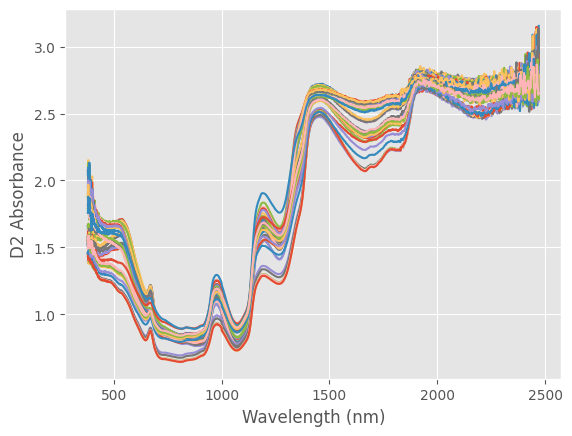

In [13]:
import matplotlib.pyplot as plt


# Define o estilo do gráfico como 'ggplot' dentro do contexto do bloco de código
# Isso significa que apenas as instruções de plotagem dentro deste bloco utilizarão o estilo 'ggplot'
# O estilo 'ggplot' é uma tentativa de replicar o estilo visual do pacote ggplot2 do R
with plt.style.context(('ggplot')): 
    # Plota os dados contidos em X2 transpostos (T) em relação aos valores de comprimento de onda armazenados em wl
    plt.plot(wl, x.T)
    
    # Define o rótulo do eixo x como 'Wavelength (nm)'
    plt.xlabel('Wavelength (nm)')
    
    # Define o rótulo do eixo y como 'D2 Absorbance'
    plt.ylabel('D2 Absorbance')
    
    # Exibe o gráfico
    plt.show()

# Pré-processamento


In [14]:

import matplotlib.pyplot as plt


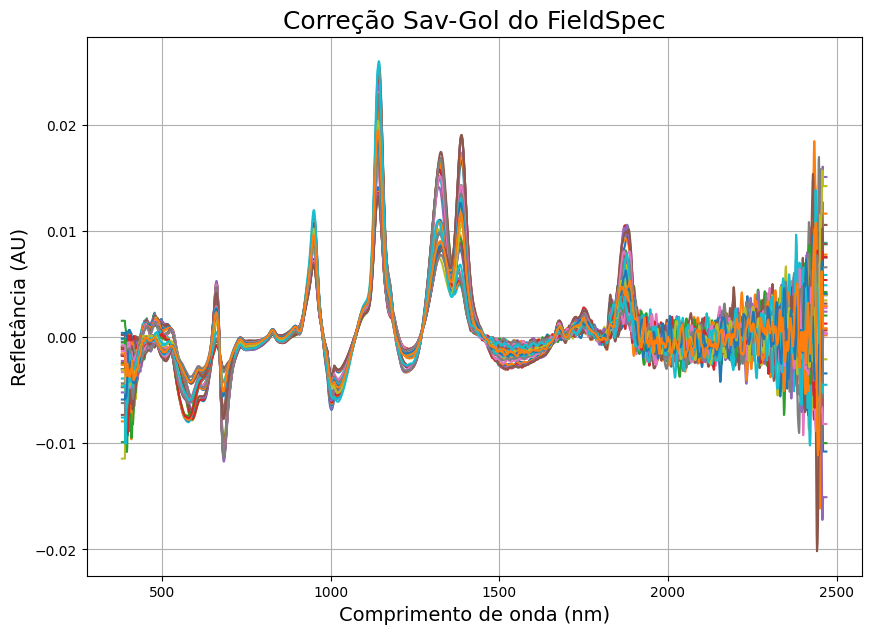

In [15]:
# Importa a função savgol_filter do módulo scipy.signal
from scipy.signal import savgol_filter

# Aplica a função savgol_filter aos dados x
# para calcular a primeira derivada dos dados
# utilizando uma janela de tamanho 20 e um polinômio de ordem 1
sav_gol = savgol_filter(x, 20, polyorder=1, deriv=1)

# Importa a biblioteca matplotlib.pyplot para plotagem
import matplotlib.pyplot as plt
    
# Define o tamanho da figura como 12x9 polegadas
plt.figure(figsize=(10,7))

# Plota os dados contidos no DataFrame df em relação aos valores do eixo x x_axis_fs
plt.plot(wl, sav_gol.T)

# Define o rótulo do eixo x como "Comprimento de onda (nm)" com tamanho de fonte 14
plt.xlabel("Comprimento de onda (nm)", size=14)

# Define o rótulo do eixo y como "Refletância (AU)" com tamanho de fonte 14
plt.ylabel("Refletância (AU)", size=14)

# Define o título do gráfico como "Espectrometria do FieldSpec" com tamanho de fonte 18
plt.title("Correção Sav-Gol do FieldSpec", size=18)

# Ativa a grade no gráfico
plt.grid("on")

# Exibe o gráfico
plt.show()


In [16]:
# Criando um DataFrame a partir dos dados contidos em X2
df = pd.DataFrame(sav_gol)

# Nome do arquivo Excel a ser exportado
filename = 'dataset_derivada_ordem_1.xlsx'

# Exportando o DataFrame para um arquivo Excel, excluindo o índice das linhas
df.to_excel(filename, index=False)

# Imprimindo uma mensagem indicando que o conjunto de dados foi exportado com sucesso para o Excel
print("Dataset exported successfully to Excel.")


Dataset exported successfully to Excel.


In [17]:
# Importando as funções MSC do módulo spectral_correction dentro do pacote pyspectra.transformers
from pyspectra.transformers.spectral_correction import msc

fs = fs_vars

# Instanciando o objeto MSC_fs para aplicar a correção MSC
MSC_fs = msc()

# Aplicando a transformação de ajuste e transformação MSC aos dados 'df' e armazenando o resultado em 'data_msc_fs'
data_msc_fs = MSC_fs.fit_transform(fs_df_final)


In [18]:
# Obtém os rótulos das colunas do DataFrame data_msc_fs e converte para um array NumPy
x_axis_fs = data_msc_fs.columns.to_numpy().astype('int64')
x_axis_fs
# Converte os valores do array para o tipo int64


array([ 380,  381,  382, ..., 2468, 2469, 2470], dtype=int64)

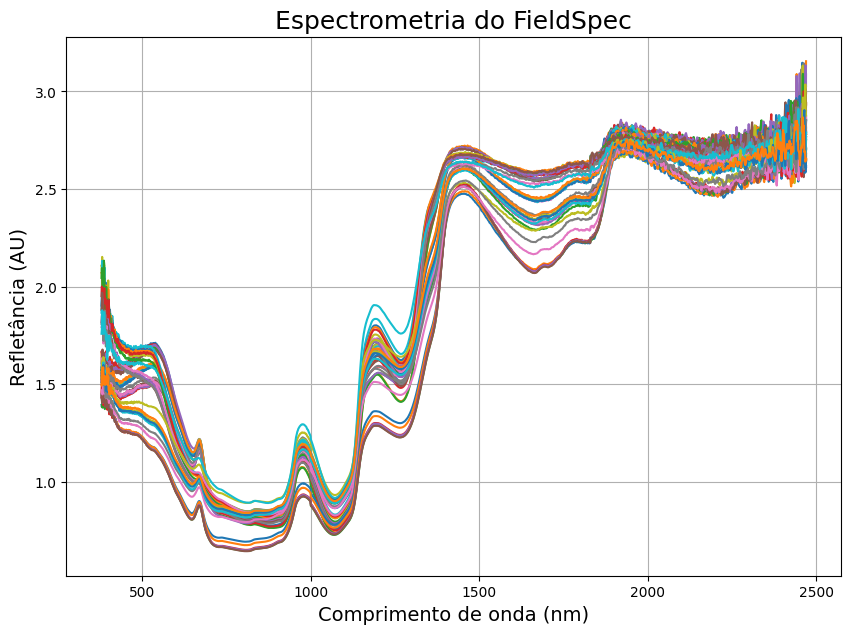

In [19]:
# Define o tamanho da figura como 12x9 polegadas
plt.figure(figsize=(10,7))

# Plota os dados contidos no DataFrame df em relação aos valores do eixo x x_axis_fs
plt.plot(x_axis_fs, fs_df_final.T)

# Define o rótulo do eixo x como "Comprimento de onda (nm)" com tamanho de fonte 14
plt.xlabel("Comprimento de onda (nm)", size=14)

# Define o rótulo do eixo y como "Refletância (AU)" com tamanho de fonte 14
plt.ylabel("Refletância (AU)", size=14)

# Define o título do gráfico como "Espectrometria do FieldSpec" com tamanho de fonte 18
plt.title("Espectrometria do FieldSpec", size=18)

# Ativa a grade no gráfico
plt.grid("on")

# Exibe o gráfico
plt.show()


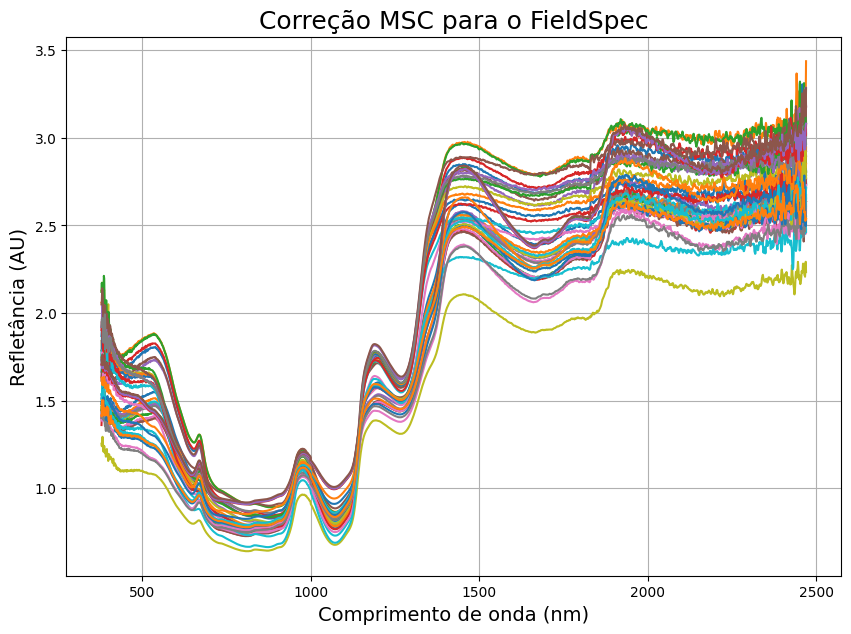

In [20]:
# Define o tamanho da figura como 12x9 polegadas
plt.figure(figsize=(10, 7))

# Plota os dados corrigidos MSC contidos no DataFrame data_msc_fs 
# em relação aos valores do eixo x x_axis_fs
plt.plot(x_axis_fs, data_msc_fs.T)

# Define o rótulo do eixo x como "Comprimento de onda (nm)" com tamanho de fonte 14
plt.xlabel("Comprimento de onda (nm)", size=14)

# Define o rótulo do eixo y como "Refletância (AU)" com tamanho de fonte 14
plt.ylabel("Refletância (AU)", size=14)

# Define o título do gráfico como "Correção MSC para o FieldSpec" com tamanho de fonte 18
plt.title("Correção MSC para o FieldSpec", size=18)

# Ativa a grade no gráfico
plt.grid("on")

# Exibe o gráfico
plt.show()


In [21]:
# Defina o nome do arquivo onde deseja salvar os dados corrigidos
filename = "dataset_msc.xlsx"

# Salve os dados corrigidos em um novo arquivo Excel
data_msc_fs.to_excel(filename, index=False)

# Exiba uma mensagem indicando que o arquivo foi salvo com sucesso
print(f"Dados corrigidos salvos com sucesso em {filename}")

Dados corrigidos salvos com sucesso em dataset_msc.xlsx


In [22]:
# Importa a função snv() do módulo spectral_correction dentro do pacote pyspectra.transformers
#from pyspectra.transformers.spectral_correction import snv

# Instancia o objeto SNV_fs para aplicar a correção SNV
#SNV_fs = snv()

# Aplica a transformação de ajuste e transformação SNV aos dados e armazena o resultado em 'data_snv_fs'
#data_snv_fs = SNV_fs.fit_transform(x)


In [29]:
import numpy as np
import pandas as pd

def snv(input_data):
    """
    Aplica a transformação Standard Normal Variate (SNV) aos dados de entrada.
    
    Parameters:
    input_data (numpy.ndarray): Dados de entrada, onde cada linha é um espectro.
    
    Returns:
    numpy.ndarray: Dados transformados após a aplicação do SNV.
    """
    # Calcular a média de cada linha
    mean = np.mean(input_data, axis=1, keepdims=True)
    # Calcular o desvio padrão de cada linha
    std_dev = np.std(input_data, axis=1, keepdims=True)
    # Aplicar a transformação SNV
    snv_data = (input_data - mean) / std_dev
    return snv_data

# Exemplo de DataFrame (substitua pelo seu DataFrame real)
fs_df_final

# Certifique-se de que os dados são numéricos
if not np.issubdtype(fs_df_final.values.dtype, np.number):
    raise ValueError("Todos os dados de entrada devem ser numéricos.")

# Aplicando a transformação SNV ao DataFrame
data_snv_fs = snv(fs_df_final.values)
data_snv_fs = pd.DataFrame(data_snv_fs, columns=fs_df_final.columns)

#data_snv_fs


In [24]:
# Defina o nome do arquivo onde deseja salvar os dados corrigidos
filename = "dataset_snv.xlsx"

# Salve os dados corrigidos em um novo arquivo Excel
data_snv_fs.to_excel(filename, index=False)

# Exiba uma mensagem indicando que o arquivo foi salvo com sucesso
print(f"Dados corrigidos salvos com sucesso em {filename}")

Dados corrigidos salvos com sucesso em dataset_snv.xlsx


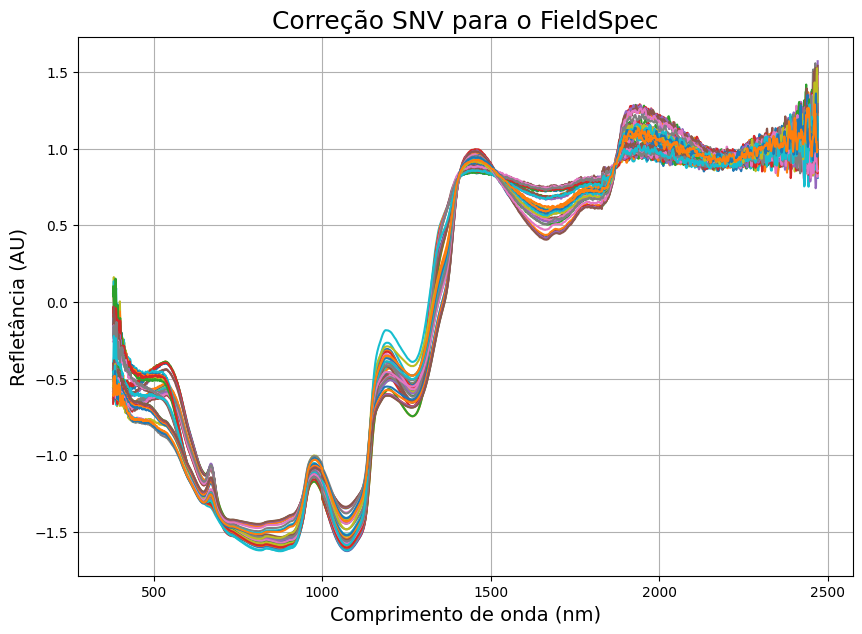

In [30]:
# Cria uma figura para o gráfico com tamanho 12x9 polegadas
plt.figure(figsize=(10, 7))

# Plota os dados corrigidos SNV em relação ao eixo x_axis_fs
plt.plot(wl, data_snv_fs.T)

# Define o rótulo do eixo x como "Comprimento de onda (nm)" e o tamanho da fonte como 14
plt.xlabel("Comprimento de onda (nm)", size=14)

# Define o rótulo do eixo y como "Refletância (AU)" e o tamanho da fonte como 14
plt.ylabel("Refletância (AU)", size=14)

# Define o título do gráfico como "Correção SNV para o FieldSpec" e o tamanho da fonte como 18
plt.title("Correção SNV para o FieldSpec", size=18)

# Adiciona uma grade ao gráfico
plt.grid("on")

# Exibe o gráfico
plt.show()


# Divisão de dados e teste de modelos

In [26]:
# Lista de conjuntos de dados espectrais (X) e atributos de qualidade (Y) para cada dispositivo
Y = fs_df[['TA', 'AV', 'AT', 'pH', 'MV', 'AR']]
X = fs_df_final

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression
x_tr, x_te, y_tr, y_te = train_test_split(X, Y, test_size=0.3, random_state=0)

pls = PLSRegression(n_components=12)
pls.fit(x_tr, y_tr)
y_pred = pls.predict(x_te)

In [53]:
print("y_pred: ", y_pred)
print("y_te: ", y_te)


y_pred:  [[1.10444902e+01 3.15064768e-01 6.19005576e+00 3.84415801e+00
  9.97652322e+02 1.11864522e+00]
 [1.14158243e+01 2.59012745e-01 5.58037487e+00 3.81445665e+00
  1.00576330e+03 2.36522525e+01]
 [9.13903476e+00 3.18764557e-01 5.81498427e+00 3.77820045e+00
  1.00178874e+03 1.87252886e+00]
 [1.01857449e+01 7.69219201e-02 3.82454351e+00 3.83109840e+00
  1.08089317e+03 1.91519933e+02]
 [1.07965096e+01 6.99176802e-02 3.92207684e+00 3.82402921e+00
  1.07908579e+03 1.88203173e+02]
 [9.11090435e+00 3.13133190e-01 5.79858034e+00 3.73118241e+00
  1.00226299e+03 4.39489249e+00]
 [1.18652962e+01 2.13266822e-01 5.26016247e+00 3.85068122e+00
  1.01672504e+03 4.91961077e+01]
 [1.06910351e+01 8.99336563e-02 4.03083979e+00 3.84609812e+00
  1.07717030e+03 1.82908460e+02]
 [1.14052814e+01 2.53725822e-01 5.47648903e+00 3.81168737e+00
  1.00378103e+03 2.07737653e+01]
 [1.07204576e+01 3.00471806e-01 6.45344672e+00 3.80147369e+00
  9.98764958e+02 3.47969768e+00]
 [9.45242148e+00 1.83208554e-01 5.1184869

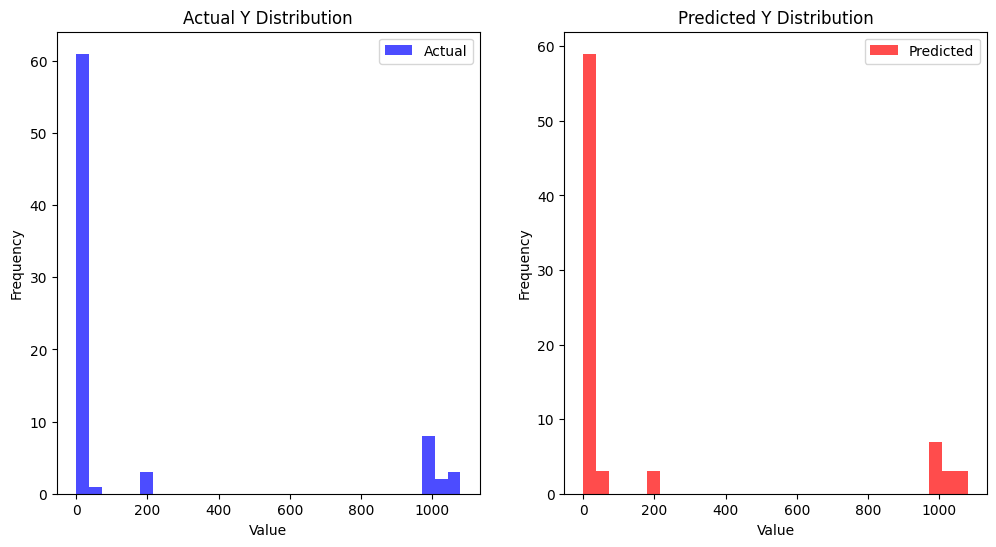

In [54]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Histograma para os valores reais de y_te
plt.subplot(1, 2, 1)
plt.hist(y_te.values.ravel(), bins=30, color='blue', alpha=0.7, label='Actual')
plt.title('Actual Y Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()

# Histograma para os valores preditos de y_pred
plt.subplot(1, 2, 2)
plt.hist(y_pred.ravel(), bins=30, color='red', alpha=0.7, label='Predicted')
plt.title('Predicted Y Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()

plt.show()


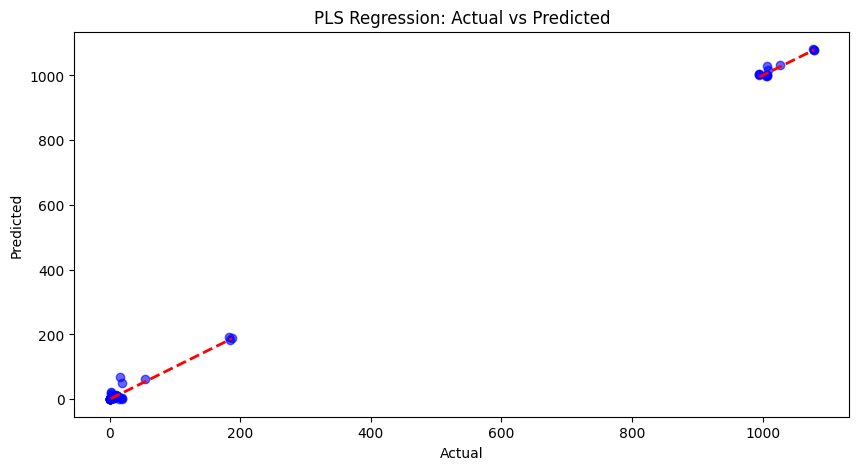

In [55]:
plt.figure(figsize=(10, 5))

plt.scatter(y_te, y_pred, color='blue', alpha=0.6)
plt.plot([y_te.min(), y_te.max()], [y_te.min(), y_te.max()], 'r--', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('PLS Regression: Actual vs Predicted')
plt.show()


In [57]:
from sklearn.model_selection import GridSearchCV
from sklearn.cross_decomposition import PLSRegression

parameters_gs = {'n_components':np.arange(1,20,1)}
pls = GridSearchCV(PLSRegression(), parameters_gs, scoring = 'neg_mean_absolute_error', verbose=0, cv=10)
pls.fit(X, Y)
print(pls.best_estimator_)

PLSRegression(n_components=12)


In [67]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
import warnings
#from spectrum import msc
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings('ignore')  # Ignora os avisos durante a execução


# Lista de métodos de pré-processamento a serem aplicados
pre_p = ["MSC", "RAW", "SNV", "Savitzky-Golay"]

# DataFrame para armazenar os resultados
results = pd.DataFrame(columns=['Dispositivo', 'Parâmetro', 'Modelo', 'Pré-processamento', 'R² Calibração', 'R² Validação', 'RMSE Calibração', 'RMSE Validação'])

columns_r = results.columns.to_list()

# Lista de dispositivos
device = ["FieldSpec"]

# Índices para os parâmetros de qualidade
index_pr = [0, 1, 2, 3, 4, 5]

# Nomes dos parâmetros de qualidade
index_pr_name = ["TA", "AV", "AT", "pH", "MV", "AR"]

# Contadores
t = 0
counter = 0

# Loop sobre os métodos de pré-processamento
for pre in pre_p:
        # Aplicação do método de pré-processamento atual
        if pre == "MSC":
            # Aplica o MSC nos dados
            x_p = data_msc_fs
            
            # Divide os dados em conjunto de treinamento e teste
            x_tr, x_te, y_tr, y_te = train_test_split(x_p, Y, test_size=0.3, random_state=0)
            
            
            # Normalização dos dados
            scaler_x = StandardScaler()
            scaler_y = StandardScaler()

            x_tr = scaler_x.fit_transform(x_tr)
            x_te = scaler_x.transform(x_te)
            y_tr = scaler_y.fit_transform(y_tr)
            y_te = scaler_y.transform(y_te)
            
            # Modelagem com PLSR
            pls = PLSRegression(n_components=12)
            pls.fit(x_tr, y_tr)
            y_pred = pls.predict(x_te)
            y_cal = pls.predict(x_tr)
            # Avaliação do modelo
            # Para cada parâmetro de qualidade
            pls_results = []
            for j in index_pr:
                r2_cal = r2_score(y_tr[:, j], y_cal[:, j])
                r2_pred = r2_score(y_te[:, j], y_pred[:, j])
                rmse_cal = np.sqrt(mean_squared_error(y_tr[:, j], y_cal[:, j]))
                rmse_pred = np.sqrt(mean_squared_error(y_te[:, j], y_pred[:, j]))
                
                result_pls = [device[t], index_pr_name[j], "PLS", pre, f"{r2_cal:.4f}", f"{r2_pred:.4f}", f"{rmse_cal:.4f}", f"{rmse_pred:.4f}"]
                
                # Adiciona os resultados à lista temporária
                pls_results.append(result_pls)

            # Converte a lista temporária em um DataFrame
            pls_df = pd.DataFrame(pls_results, columns=columns_r)

            # Concatena o DataFrame temporário aos resultados
            results = pd.concat([results, pls_df], ignore_index=True)
            
            counter += 1
            print(1)
            
            # Outros modelos e avaliações
            # (mesma lógica que PLSR)
            
            rf = RandomForestRegressor()
            rf.fit(x_tr, y_tr)
            y_pred = rf.predict(x_te)
            y_cal = rf.predict(x_tr)

            # Lista temporária para armazenar os resultados de RandomForestRegressor
            rf_results = []

            for j in index_pr:
                r2_cal = r2_score(y_tr[:, j], y_cal[:, j])
                r2_pred = r2_score(y_te[:, j], y_pred[:, j])
                rmse_cal = np.sqrt(mean_squared_error(y_tr[:, j], y_cal[:, j]))
                rmse_pred = np.sqrt(mean_squared_error(y_te[:, j], y_pred[:, j]))

                # Cria uma lista com os resultados
                result_rf = [device[t], index_pr_name[j], "RF", pre, f"{r2_cal:.4f}", f"{r2_pred:.4f}", f"{rmse_cal:.4f}", f"{rmse_pred:.4f}"]
                
                # Adiciona os resultados à lista temporária
                rf_results.append(result_rf)

            # Converte a lista temporária em um DataFrame
            rf_df = pd.DataFrame(rf_results, columns=columns_r)

            # Concatena o DataFrame temporário aos resultados
            results = pd.concat([results, rf_df], ignore_index=True)

            mlpr = MLPRegressor(max_iter=400, solver="adam", learning_rate_init=0.01)
            mlpr.fit(x_tr, y_tr)
            y_pred = mlpr.predict(x_te)
            y_cal = mlpr.predict(x_tr)

            # Lista temporária para armazenar os resultados de MLPRegressor
            mlpr_results = []
            print(2)

            for j in index_pr:
                r2_cal = r2_score(y_tr[:, j], y_cal[:, j])
                r2_pred = r2_score(y_te[:, j], y_pred[:, j])
                rmse_cal = np.sqrt(mean_squared_error(y_tr[:, j], y_cal[:, j]))
                rmse_pred = np.sqrt(mean_squared_error(y_te[:, j], y_pred[:, j]))

                # Cria uma lista com os resultados
                result_mlpr = [device[t], index_pr_name[j], "MLPR", pre, f"{r2_cal:.4f}", f"{r2_pred:.4f}", f"{rmse_cal:.4f}", f"{rmse_pred:.4f}"]
                
                # Adiciona os resultados à lista temporária
                mlpr_results.append(result_mlpr)

            # Converte a lista temporária em um DataFrame
            mlpr_df = pd.DataFrame(mlpr_results, columns=columns_r)

            # Concatena o DataFrame temporário aos resultados
            results = pd.concat([results, mlpr_df], ignore_index=True)
            
            print(3)

            
        elif pre == "RAW":
            x_tr, x_te, y_tr, y_te = train_test_split(X, Y, test_size=0.3, random_state = 0)

            pls = PLSRegression(n_components=12)
            pls.fit(x_tr, y_tr)
            y_pred = pls.predict(x_te)
            y_cal = pls.predict(x_tr)

            pls_results = []
            for j in index_pr:
                r2_cal = r2_score(y_tr.iloc[:, j], y_cal[:, j])
                r2_pred = r2_score(y_te.iloc[:, j], y_pred[:, j])
                rmse_cal = np.sqrt(mean_squared_error(y_tr.iloc[:, j], y_cal[:, j]))
                rmse_pred = np.sqrt(mean_squared_error(y_te.iloc[:, j], y_pred[:, j]))

                result_pls = [device[t], index_pr_name[j], "PLS", pre, f"{r2_cal:.4f}", f"{r2_pred:.4f}", f"{rmse_cal:.4f}", f"{rmse_pred:.4f}"]
                
                # Adiciona os resultados à lista temporária
                pls_results.append(result_pls)

            # Converte a lista temporária em um DataFrame
            pls_df = pd.DataFrame(pls_results, columns=columns_r)

            # Concatena o DataFrame temporário aos resultados
            results = pd.concat([results, pls_df], ignore_index=True)

            rf = RandomForestRegressor()
            rf.fit(x_tr, y_tr)
            y_pred = rf.predict(x_te)
            y_cal = rf.predict(x_tr)
            
            print(4)

            rf_results = []
            for j in index_pr:
                r2_cal = r2_score(y_tr.iloc[:, j], y_cal[:, j])
                r2_pred = r2_score(y_te.iloc[:, j], y_pred[:, j])
                rmse_cal = np.sqrt(mean_squared_error(y_tr.iloc[:, j], y_cal[:, j]))
                rmse_pred = np.sqrt(mean_squared_error(y_te.iloc[:, j], y_pred[:, j]))

                # Cria uma lista com os resultados
                result_rf = [device[t], index_pr_name[j], "RF", pre, f"{r2_cal:.4f}", f"{r2_pred:.4f}", f"{rmse_cal:.4f}", f"{rmse_pred:.4f}"]
                
                # Adiciona os resultados à lista temporária
                rf_results.append(result_rf)

            # Converte a lista temporária em um DataFrame
            rf_df = pd.DataFrame(rf_results, columns=columns_r)

            # Concatena o DataFrame temporário aos resultados
            results = pd.concat([results, rf_df], ignore_index=True)
            
            print(5)
            
            mlpr_results = []

            mlpr = MLPRegressor(max_iter=400, solver= "adam", learning_rate_init= 0.01)
            mlpr.fit(x_tr, y_tr)
            y_pred = mlpr.predict(x_te)
            y_cal = mlpr.predict(x_tr)

            for j in index_pr:
                r2_cal = r2_score(y_tr.iloc[:, j], y_cal[:, j])
                r2_pred = r2_score(y_te.iloc[:, j], y_pred[:, j])
                rmse_cal = np.sqrt(mean_squared_error(y_tr.iloc[:, j], y_cal[:, j]))
                rmse_pred = np.sqrt(mean_squared_error(y_te.iloc[:, j], y_pred[:, j]))

                # Cria uma lista com os resultados
                result_mlpr = [device[t], index_pr_name[j], "MLPR", pre, f"{r2_cal:.4f}", f"{r2_pred:.4f}", f"{rmse_cal:.4f}", f"{rmse_pred:.4f}"]
                
                # Adiciona os resultados à lista temporária
                mlpr_results.append(result_mlpr)

            # Converte a lista temporária em um DataFrame
            mlpr_df = pd.DataFrame(mlpr_results, columns=columns_r)

            # Concatena o DataFrame temporário aos resultados
            results = pd.concat([results, mlpr_df], ignore_index=True)
            
            print(6)
            
        elif pre == "SNV":
            x_p = data_snv_fs

            x_tr, x_te, y_tr, y_te = train_test_split(x_p, Y, test_size=0.3, random_state = 0)

            pls = PLSRegression(n_components=12)
            pls.fit(x_tr, y_tr)
            y_pred = pls.predict(x_te)
            y_cal = pls.predict(x_tr)
            
            pls_results = []

            for j in index_pr:
                r2_cal = r2_score(y_tr.iloc[:, j], y_cal[:, j])
                r2_pred = r2_score(y_te.iloc[:, j], y_pred[:, j])
                rmse_cal = np.sqrt(mean_squared_error(y_tr.iloc[:, j], y_cal[:, j]))
                rmse_pred = np.sqrt(mean_squared_error(y_te.iloc[:, j], y_pred[:, j]))

                result_pls = [device[t], index_pr_name[j], "PLS", pre, f"{r2_cal:.4f}", f"{r2_pred:.4f}", f"{rmse_cal:.4f}", f"{rmse_pred:.4f}"]
                
                # Adiciona os resultados à lista temporária
                pls_results.append(result_pls)

            # Converte a lista temporária em um DataFrame
            pls_df = pd.DataFrame(pls_results, columns=columns_r)

            # Concatena o DataFrame temporário aos resultados
            results = pd.concat([results, pls_df], ignore_index=True)

            
            print(7)
            rf = RandomForestRegressor()
            rf.fit(x_tr, y_tr)
            y_pred = rf.predict(x_te)
            y_cal = rf.predict(x_tr)

            rf_results = []
            for j in index_pr:
                r2_cal = r2_score(y_tr.iloc[:, j], y_cal[:, j])
                r2_pred = r2_score(y_te.iloc[:, j], y_pred[:, j])
                rmse_cal = np.sqrt(mean_squared_error(y_tr.iloc[:, j], y_cal[:, j]))
                rmse_pred = np.sqrt(mean_squared_error(y_te.iloc[:, j], y_pred[:, j]))

                # Cria uma lista com os resultados
                result_rf = [device[t], index_pr_name[j], "RF", pre, f"{r2_cal:.4f}", f"{r2_pred:.4f}", f"{rmse_cal:.4f}", f"{rmse_pred:.4f}"]
                
                # Adiciona os resultados à lista temporária
                rf_results.append(result_rf)

            # Converte a lista temporária em um DataFrame
            rf_df = pd.DataFrame(rf_results, columns=columns_r)

            # Concatena o DataFrame temporário aos resultados
            results = pd.concat([results, rf_df], ignore_index=True)

            print(8)
            mlpr = MLPRegressor(max_iter=400, solver= "adam", learning_rate_init= 0.01)
            mlpr.fit(x_tr, y_tr)
            y_pred = mlpr.predict(x_te)
            y_cal = mlpr.predict(x_tr)
            
            mlpr_results = []

            for j in index_pr:
                r2_cal = r2_score(y_tr.iloc[:, j], y_cal[:, j])
                r2_pred = r2_score(y_te.iloc[:, j], y_pred[:, j])
                rmse_cal = np.sqrt(mean_squared_error(y_tr.iloc[:, j], y_cal[:, j]))
                rmse_pred = np.sqrt(mean_squared_error(y_te.iloc[:, j], y_pred[:, j]))

                # Cria uma lista com os resultados
                result_mlpr = [device[t], index_pr_name[j], "MLPR", pre, f"{r2_cal:.4f}", f"{r2_pred:.4f}", f"{rmse_cal:.4f}", f"{rmse_pred:.4f}"]
                
                # Adiciona os resultados à lista temporária
                mlpr_results.append(result_mlpr)

            # Converte a lista temporária em um DataFrame
            mlpr_df = pd.DataFrame(mlpr_results, columns=columns_r)

            # Concatena o DataFrame temporário aos resultados
            results = pd.concat([results, mlpr_df], ignore_index=True)
            print(9)
            
        else:
            x_p = savgol_filter(x, 17, polyorder = 2, deriv=2)

            x_tr, x_te, y_tr, y_te = train_test_split(x_p, Y, test_size=0.3, random_state = 0)

            pls = PLSRegression(n_components=12)
            pls.fit(x_tr, y_tr)
            y_pred = pls.predict(x_te)
            y_cal = pls.predict(x_tr)
            
            pls_results = []

            for j in index_pr:
                r2_cal = r2_score(y_tr.iloc[:, j], y_cal[:, j])
                r2_pred = r2_score(y_te.iloc[:, j], y_pred[:, j])
                rmse_cal = np.sqrt(mean_squared_error(y_tr.iloc[:, j], y_cal[:, j]))
                rmse_pred = np.sqrt(mean_squared_error(y_te.iloc[:, j], y_pred[:, j]))

                result_pls = [device[t], index_pr_name[j], "PLS", pre, f"{r2_cal:.4f}", f"{r2_pred:.4f}", f"{rmse_cal:.4f}", f"{rmse_pred:.4f}"]
                
                # Adiciona os resultados à lista temporária
                pls_results.append(result_pls)

            # Converte a lista temporária em um DataFrame
            pls_df = pd.DataFrame(pls_results, columns=columns_r)

            # Concatena o DataFrame temporário aos resultados
            results = pd.concat([results, pls_df], ignore_index=True)

            print(10)
            rf = RandomForestRegressor()
            rf.fit(x_tr, y_tr)
            y_pred = rf.predict(x_te)
            y_cal = rf.predict(x_tr)
            
            rf_results = []

            for j in index_pr:
                r2_cal = r2_score(y_tr.iloc[:, j], y_cal[:, j])
                r2_pred = r2_score(y_te.iloc[:, j], y_pred[:, j])
                rmse_cal = np.sqrt(mean_squared_error(y_tr.iloc[:, j], y_cal[:, j]))
                rmse_pred = np.sqrt(mean_squared_error(y_te.iloc[:, j], y_pred[:, j]))

                # Cria uma lista com os resultados
                result_rf = [device[t], index_pr_name[j], "RF", pre, f"{r2_cal:.4f}", f"{r2_pred:.4f}", f"{rmse_cal:.4f}", f"{rmse_pred:.4f}"]
                
                # Adiciona os resultados à lista temporária
                rf_results.append(result_rf)

            # Converte a lista temporária em um DataFrame
            rf_df = pd.DataFrame(rf_results, columns=columns_r)

            # Concatena o DataFrame temporário aos resultados
            results = pd.concat([results, rf_df], ignore_index=True)


            print(11)
            mlpr = MLPRegressor(max_iter=400, solver= "adam", learning_rate_init= 0.01)
            mlpr.fit(x_tr, y_tr)
            y_pred = mlpr.predict(x_te)
            y_cal = mlpr.predict(x_tr)
            mlpr_results = []
            for j in index_pr:
                r2_cal = r2_score(y_tr.iloc[:, j], y_cal[:, j])
                r2_pred = r2_score(y_te.iloc[:, j], y_pred[:, j])
                rmse_cal = np.sqrt(mean_squared_error(y_tr.iloc[:, j], y_cal[:, j]))
                rmse_pred = np.sqrt(mean_squared_error(y_te.iloc[:, j], y_pred[:, j]))

                result_mlpr = [device[t], index_pr_name[j], "MLPR", pre, f"{r2_cal:.4f}", f"{r2_pred:.4f}", f"{rmse_cal:.4f}", f"{rmse_pred:.4f}"]
                
                # Adiciona os resultados à lista temporária
                mlpr_results.append(result_mlpr)

            # Converte a lista temporária em um DataFrame
            mlpr_df = pd.DataFrame(mlpr_results, columns=columns_r)

            # Concatena o DataFrame temporário aos resultados
            results = pd.concat([results, mlpr_df], ignore_index=True)
            print(12)
# Exibe os resultados

results          

1
2
3
4
5
6
7
8
9
10
11
12


,Dispositivo,Parâmetro,Modelo,Pré-processamento,R² Calibração,R² Validação,RMSE Calibração,RMSE Validação
0,FieldSpec,TA,PLS,MSC,0.9948,0.5007,0.0722,0.5447
1,FieldSpec,AV,PLS,MSC,0.9927,0.6979,0.0852,0.5163
2,FieldSpec,AT,PLS,MSC,0.9929,0.4905,0.0844,0.6191
3,FieldSpec,pH,PLS,MSC,0.9927,-14759858467383858671794092244992.0000,0.0856,0.4265
4,FieldSpec,MV,PLS,MSC,0.9959,0.9340,0.0639,0.2326
...,...,...,...,...,...,...,...,...
67,FieldSpec,AV,MLPR,Savitzky-Golay,-0.8887,-2.8651,0.1299,0.1745
68,FieldSpec,AT,MLPR,Savitzky-Golay,-0.1206,-1.1823,0.9129,1.1048
69,FieldSpec,pH,MLPR,Savitzky-Golay,-10.4084,-115479761502536120248374919168.0000,0.1751,0.3018
70,FieldSpec,MV,MLPR,Savitzky-Golay,-39.0286,-69.0695,221.6220,265.4072


In [60]:
results


,Dispositivo,Parâmetro,Modelo,Pré-processamento,R² Calibração,R² Validação,RMSE Calibração,RMSE Validação
0,FieldSpec,TA,PLS,MSC,0.9948,0.5007,0.0975,0.7357
1,FieldSpec,AV,PLS,MSC,0.9927,0.6979,0.0081,0.0488
2,FieldSpec,AT,PLS,MSC,0.9929,0.4905,0.0728,0.5339
3,FieldSpec,pH,PLS,MSC,0.9927,-619747327145638493914398720.0000,0.0044,0.0221
4,FieldSpec,MV,PLS,MSC,0.9959,0.9340,2.2370,8.1466
...,...,...,...,...,...,...,...,...
67,FieldSpec,AV,MLPR,Savitzky-Golay,-0.1314,-1.3023,0.1005,0.1347
68,FieldSpec,AT,MLPR,Savitzky-Golay,-0.1120,-1.1186,0.9093,1.0886
69,FieldSpec,pH,MLPR,Savitzky-Golay,-16.8482,-231901514292978121691881275392.0000,0.2190,0.4277
70,FieldSpec,MV,MLPR,Savitzky-Golay,-14.4465,-33.9187,137.6710,187.3601


# Resultados

In [35]:
# Salve os dados corrigidos em um novo arquivo Excel
results.to_excel("./results.xlsx", index=False, float_format="%.4f")



In [36]:
result = pd.read_excel('./results.xlsx')

In [37]:
results['R² Calibração'] = results['R² Calibração'].astype('float64')
results['R² Validação'] = results['R² Validação'].astype('float64')
results['RMSE Calibração'] = results['RMSE Calibração'].astype('float64')
results['RMSE Validação'] = results['RMSE Validação'].astype('float64')

In [38]:
import plotly.express as px

# Iterar sobre cada parâmetro
for parametro in results["Parâmetro"].unique():
    # Filtrar o DataFrame para o parâmetro atual
    df_parametro = results[results["Parâmetro"] == parametro]
    
    # Criando o gráfico de barras com Plotly Express
    fig = px.bar(df_parametro,
                 x="Pré-processamento",
                 y="RMSE Calibração",
                 facet_col="Modelo",
                 color="Modelo",
                 title=f'Métricas de resultados para o {df_parametro["Dispositivo"].unique().tolist()[0]} - Parâmetro: {parametro}',
                 text_auto=True,
                 template='plotly',
                 facet_row_spacing=0.2,
                 facet_col_spacing=0.1)  # Adicionando espaço entre as colunas

    # Atualizando o layout do gráfico
    fig.update_layout(title=dict(font=dict(size=23), yref='paper'), height=500)
    fig.update_yaxes(matches=None)
    fig.update_xaxes(tickangle=45)

    # Exibindo o gráfico
    fig.show()


### PLSR

In [39]:
pls_fs = PLSRegression(n_components=10)
pls_fs.fit(x_tr, y_tr)

y_pred_fs = pls_fs.predict(x_te)
y_cal_fs = pls_fs.predict(x_tr)

In [40]:
pd.DataFrame(y_pred_fs)

,0,1,2,3,4,5
0,10.529370,0.296076,5.911690,3.814662,1005.313503,18.423363
1,10.725788,0.280386,5.595294,3.801937,1004.168967,17.138130
2,9.071596,0.289969,5.950623,3.774767,1006.723645,14.759314
3,10.166274,0.072663,3.885597,3.825906,1082.834280,194.266536
4,10.572139,0.109356,4.548897,3.815095,1067.903674,162.065913
5,9.341824,0.289831,6.038948,3.799999,1011.676186,25.400314
6,10.836588,0.253556,5.198625,3.802717,1009.896989,30.753643
7,10.384342,0.105699,4.368893,3.829448,1070.981122,168.523514
8,11.292559,0.277238,5.401764,3.792348,1000.259917,11.381654
9,10.639854,0.283425,5.896628,3.812345,1011.275868,31.858340


In [41]:
r2_cal_fs = r2_score(y_tr, y_cal_fs)
r2_pred_fs = r2_score(y_te, y_pred_fs)

rmse_cal_fs = np.sqrt(mean_squared_error(y_tr, y_cal_fs))
rmse_pred_fs = np.sqrt(mean_squared_error(y_te, y_pred_fs))

In [42]:
print(f' ---PLSR--- \n\n R²calibração: {r2_cal_fs: .4f} \
       \n R²predição: {r2_pred_fs: .4f} \
       \n RMSEcalibração: {rmse_cal_fs: .4f} \
       \n RMSEpredição: {rmse_pred_fs: .4f} \n\n')

 ---PLSR--- 

 R²calibração:  0.9971        
 R²predição: -61627316199595976832319488.0000        
 RMSEcalibração:  0.8447        
 RMSEpredição:  7.5298 




In [43]:
y_pred_fs[:, 0]

array([10.52937034, 10.72578766,  9.07159586, 10.16627355, 10.57213949,
        9.34182399, 10.83658753, 10.38434205, 11.29255946, 10.63985396,
       10.05204863,  7.68507504, 10.85806432])

### GridSearch

In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.cross_decomposition import PLSRegression
import numpy as np

parameters_gs = {'n_components': np.arange(1, 20, 1)}
pls = GridSearchCV(PLSRegression(), parameters_gs, scoring='neg_mean_squared_error', verbose=0, cv=10)
pls.fit(X, Y)
print(pls.best_estimator_)
#r2_score(Y_test.iloc[:, 2], y_pred_fs.iloc[:, 2])
from sklearn.model_selection import cross_val_predict

y_cv = cross_val_predict(pls.best_estimator_, X, Y, cv=20)
# Optional: calculate figures of merit
rmse, score = np.sqrt(mean_squared_error(Y, y_cv)), r2_score(Y, y_cv)
print(f'{rmse} \n {score}')


PLSRegression(n_components=12)
6.3500207022082416 
 0.7895287528479411


### Random Forest

In [45]:
rfr_fs = RandomForestRegressor()
rfr_fs.fit(x_tr, y_tr)

y_pred_fs = rfr_fs.predict(x_te)
y_cal_fs = rfr_fs.predict(x_tr)

In [46]:
r2_cal_fs = r2_score(y_tr, y_cal_fs)
r2_pred_fs = r2_score(y_te, y_pred_fs)

rmse_cal_fs = np.sqrt(mean_squared_error(y_tr, y_cal_fs))
rmse_pred_fs = np.sqrt(mean_squared_error(y_te, y_pred_fs))

In [47]:
print(f' ---Random Forest Regressor--- \n\n R²calibração: {r2_cal_fs: .4f} \
       \n R²predição: {r2_pred_fs: .4f} \
       \n RMSEcalibração: {rmse_cal_fs: .4f} \
       \n RMSEpredição: {rmse_pred_fs: .4f} \n\n')

 ---Random Forest Regressor--- 

 R²calibração:  0.9768        
 R²predição: -99998130041091025199431680.0000        
 RMSEcalibração:  1.5556        
 RMSEpredição:  3.8229 




### MLP Regressor

In [ ]:
mlp_fs = MLPRegressor(max_iter=400, solver="adam", learning_rate_init= 0.01)
mlp_fs.fit(X_train, Y_train)

y_pred_fs = mlp_fs.predict(X_test)
y_cal_fs = mlp_fs.predict(X_train)

In [ ]:
r2_cal_fs = r2_score(Y_train, y_cal_fs)
r2_pred_fs = r2_score(Y_test, y_pred_fs)

rmse_cal_fs = np.sqrt(mean_squared_error(Y_train, y_cal_fs))
rmse_pred_fs = np.sqrt(mean_squared_error(Y_test, y_pred_fs))

print(f' ---MLP Regressor--- \n\n R²calibração: {r2_cal_fs: .4f} \
       \n R²predição: {r2_pred_fs: .4f} \
       \n RMSEcalibração: {rmse_cal_fs: .4f} \
       \n RMSEpredição: {rmse_pred_fs: .4f} \n\n')

 ---MLP Regressor--- 

 R²calibração: -28.8235        
 R²predição: -766.8533        
 RMSEcalibração:  17.4538        
 RMSEpredição:  32.1466 




In [ ]:
import pickle
filename = 'finalized_model_fs.sav'
pickle.dump(rfr_fs, open(filename, 'wb'))

loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.predict(X_test)

In [ ]:
r2_score(Y_test, result)

-3.511419451664493